## Test notebook for developing latitude longitude binning

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
import time

In [4]:
#defining a function to generate random floats
def get_random(low,hi,size):
    x = np.empty(size)
    for i in range(size):
        x[i] = rn.uniform(low,hi)
    return x

In [28]:
#defining fake data for plot and station locations
stations = int(1e4)
plots = int(9.7e4)
map_size = 100
fsta = pd.DataFrame({'station':np.arange(1,stations+1,1),
                     'lat':get_random(-map_size,map_size,stations),
                     'long':get_random(-map_size,map_size,stations)})
fplt = pd.DataFrame({'station':np.arange(1,plots+1,1),
                     'lat':get_random(-map_size,map_size,plots),
                     'long':get_random(-map_size,map_size,plots)})

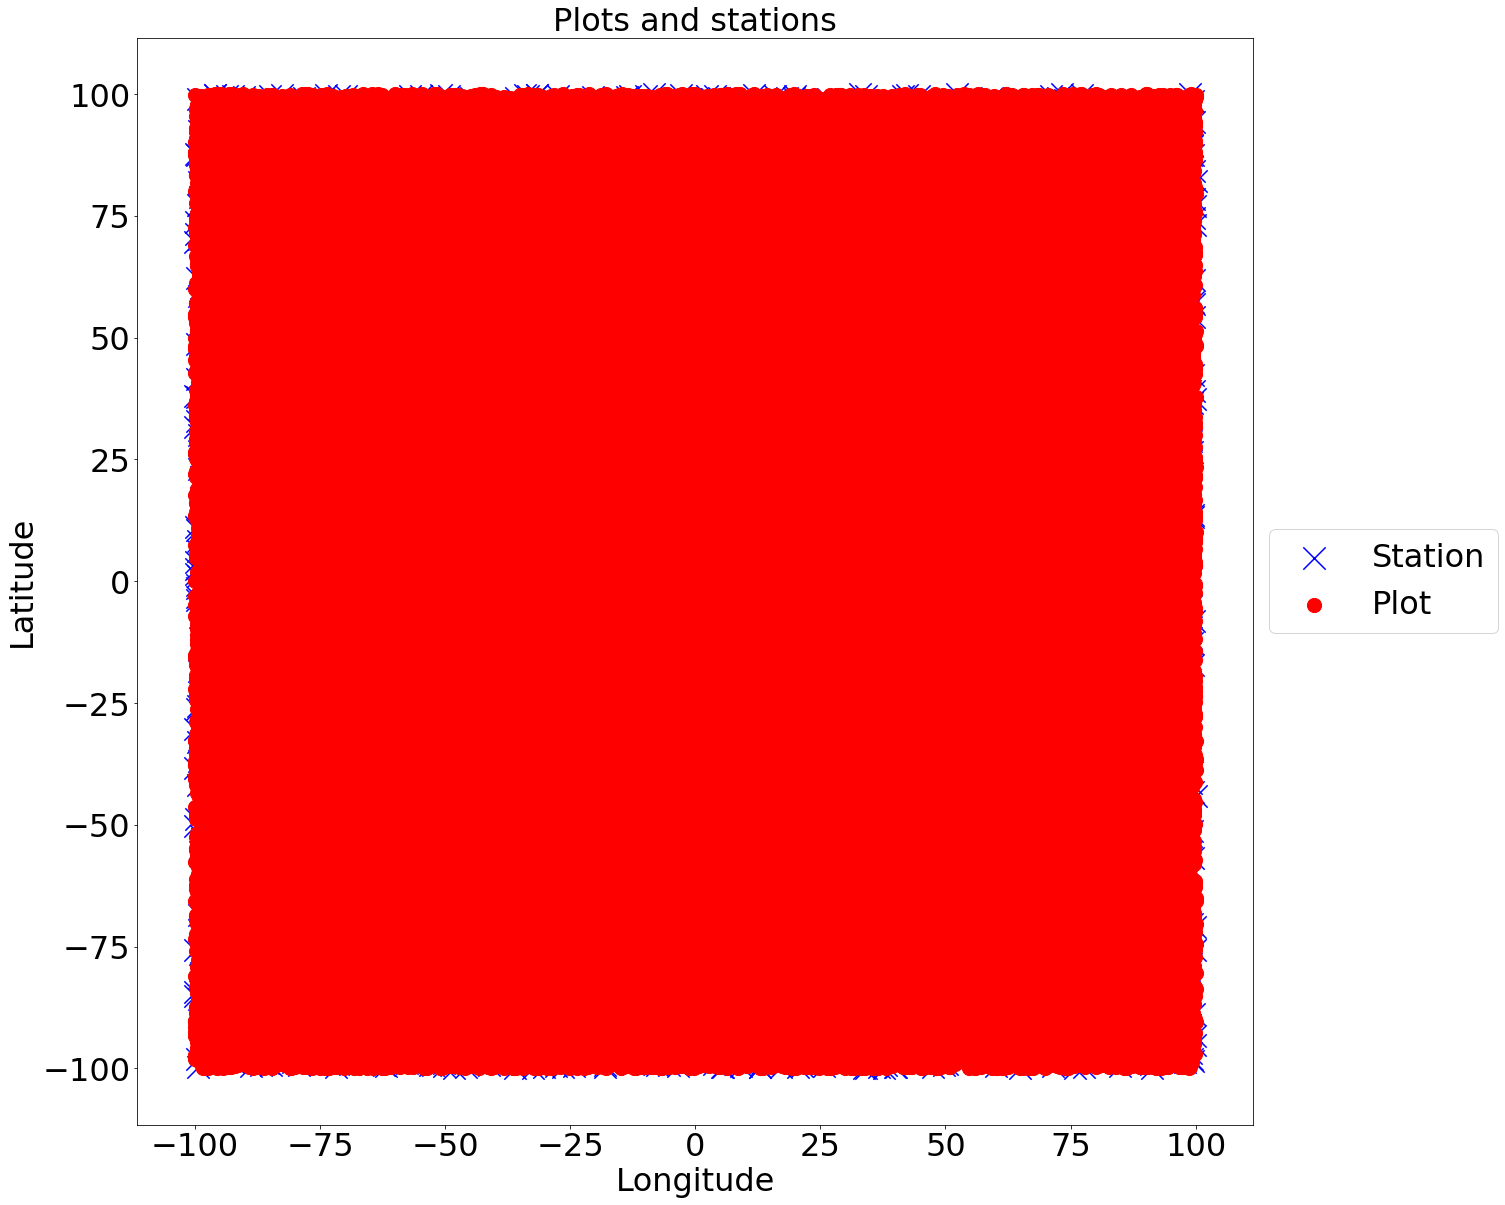

In [29]:
#ploting the raw data
plt.figure(figsize=(20,20))
plt.title('Plots and stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c='b', s=500, marker = 'x', label = 'Station')
plt.scatter(fplt.long, fplt.lat, s=200, c='r', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()

In [30]:
#defining a function that finds the stations nearest a set of longitude and latitude
def find_nearest(lat1, long1, df):
    distances = np.sqrt((lat1-df.lat)**2 + (long1-df.long)**2)
    nearest_index = distances.argmin()
    return df.iloc[nearest_index]

#function that applies find_nearest to every plot
def get_station(sta,plt):
    t0 = time.perf_counter()
    
    plt_copy = plt.copy()
    nstation = np.empty(len(plt_copy))
    
    for i in range(len(plt_copy)):
        
        temp = find_nearest(plt_copy.lat[i],plt_copy.long[i],sta)
        nstation[i] = temp.station
        
    plt_copy['nearest_station'] = nstation
    
    t1 = time.perf_counter()
    total_t = t1-t0
    multiplier = 1e6 / len(plt)
    print(f'With %d stations and %d plots' %(len(sta), len(plt)))
    print(f'This function took %.1f seconds to complete' %total_t)
    
    print(f'With %d stations and %d plots' %( len(sta), int(1e6) ))
    print(f'This function would take %.1f seconds to complete' %(total_t*multiplier))
    return plt_copy

In [ ]:
fplt_wstation = get_station(fsta,fplt)

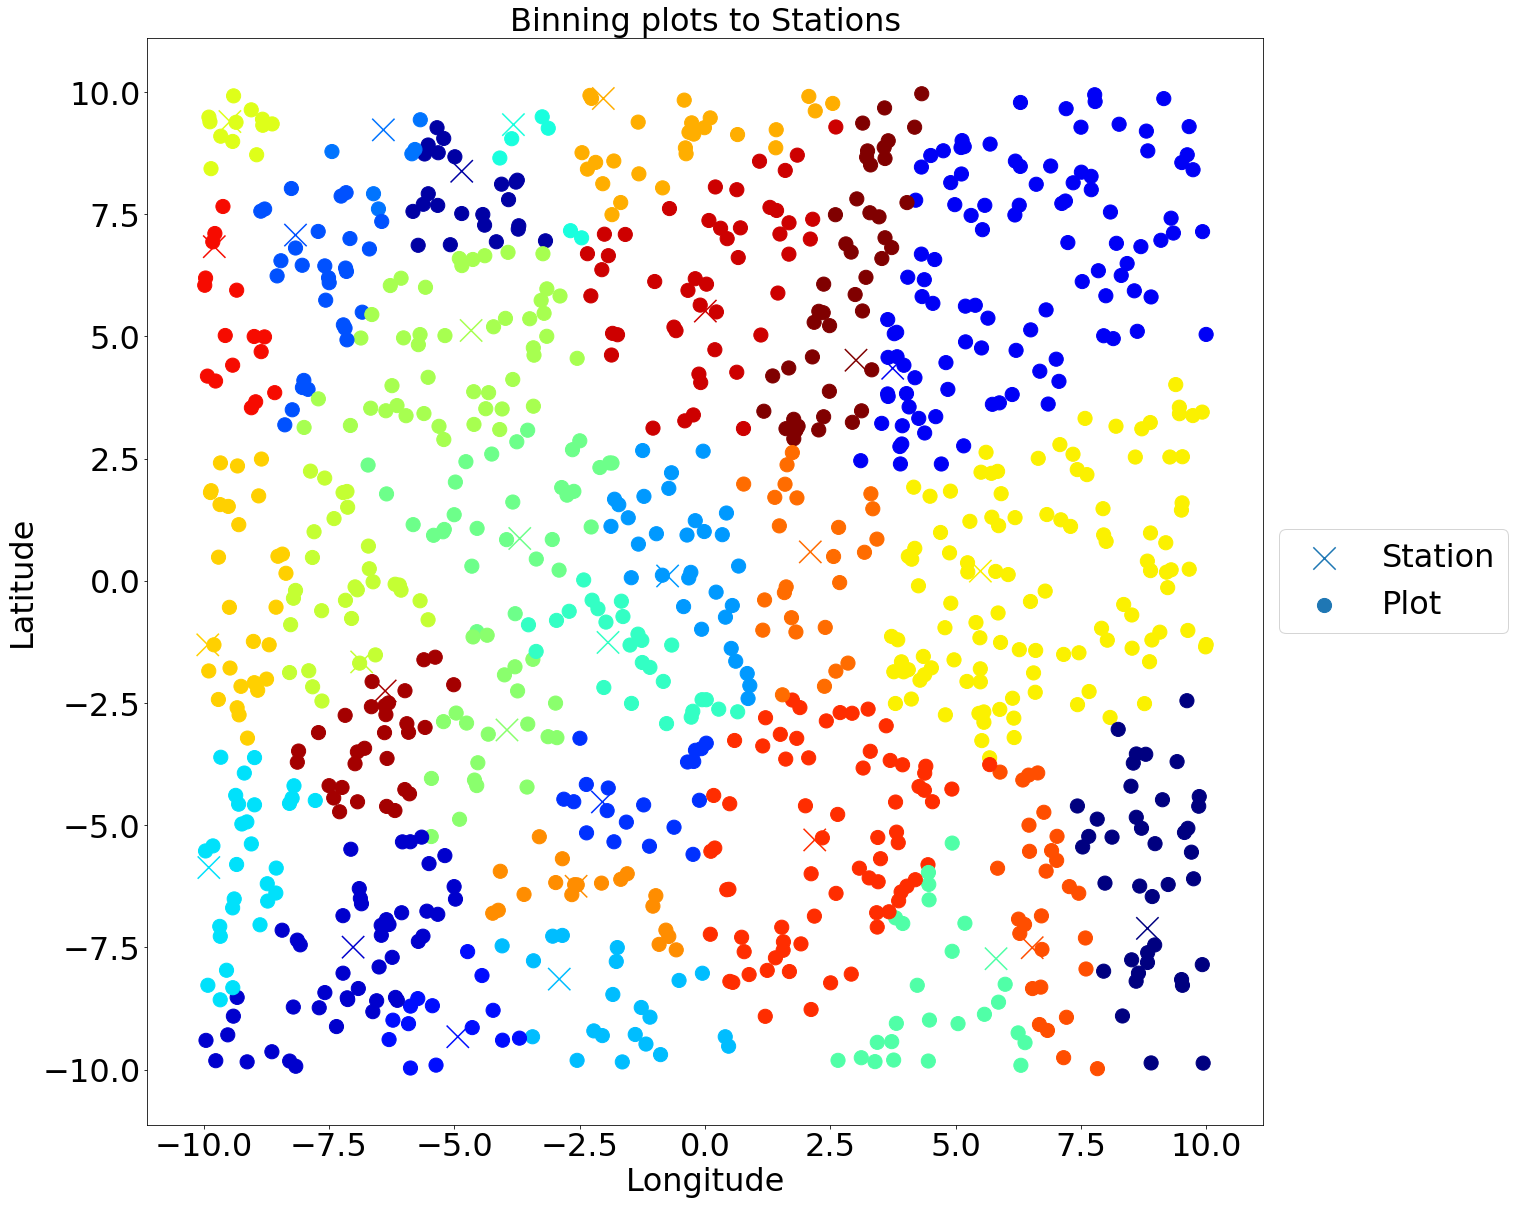

In [21]:
#ploting the results
#color corresponds to each location
plt.figure(figsize=(20,20))
plt.title('Binning plots to Stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c=fsta.station, s=500, marker = 'x', cmap='jet', label = 'Station')
plt.scatter(fplt_wstation.long, fplt_wstation.lat, s=200, c=fplt_wstation.nearest_station, cmap='jet', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()